#### Import dependencies

In [1]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import pylast
import time
import iso3166 as iso
import csv

#### Declare variables

In [17]:
#boredom
outputPath = "../Output/"
inputPath = "../Input/"

#input locations
artistCSV = f"{inputPath}artist.csv"
coordsCSV = f"{inputPath}country_coords.csv"
countriesArtistCSV = f"{inputPath}countriesTopArtist.csv"
countriesTopGenres = f"{inputPath}countriesTopGenres.csv"

#png output locations
barOutputPath = f"{outputPath}TopArtistCountryCounts"
lineOutputPath = f"{outputPath}CountryListenerCounts"

#### Create Artist Dataframes and Determine Top Artist

In [3]:
artistDF = pd.read_csv(artistCSV)
topArtistDF = artistDF.sort_values('stats.listeners',ascending=False).head(1)

topArtistDF

,Unnamed: 0,name_genre,name,stats.listeners,stats.playcount,streamable
50,0,rock,Coldplay,5817856,391846783,0


#### Create Artist by Country Dataframes and determine which of those countries plays the top artist

In [4]:
countryArtistDF = pd.read_csv(countriesArtistCSV)
countryFilterDF = pd.merge(countryArtistDF, artistDF, on="name")

groupedDF = countryFilterDF.groupby('name').agg(**{"Country Counts":("country", "count")})
groupedDF.reset_index(inplace=True)
groupedDF = groupedDF.rename(columns = {'name':'Artist Name'})

countryCountSorted = groupedDF.sort_values('Country Counts', ascending=False).head(20)
countryCountSorted

,Artist Name,Country Counts
173,Coldplay,169
736,The Weeknd,165
689,The Beatles,159
227,Ed Sheeran,158
646,Sia,152
600,Radiohead,148
16,Adele,147
611,Rihanna,147
489,Michael Jackson,146
185,Daft Punk,142


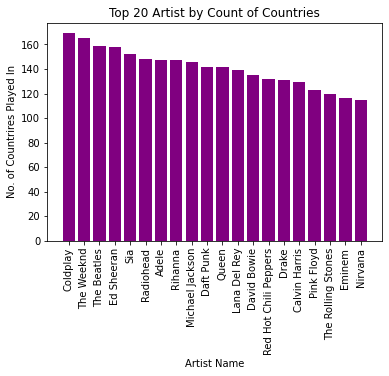

In [5]:
#get plot (dot) data
dotX = countryCountSorted["Artist Name"]
dotY = countryCountSorted["Country Counts"]

plt.bar(dotX, dotY, color="purple",)
plt.title('Top 20 Artist by Count of Countries')
plt.xlabel('Artist Name')
plt.ylabel('No. of Countrires Played In')
plt.xticks(rotation=90)
plt.savefig(barOutputPath)
plt.show()

#### Top 20 countries by listener counts

In [6]:
groupedCountryArtist = countryFilterDF.groupby('country').agg(**{"total listeners":("listeners", "sum")
                                                                ,"total playcounts":("stats.playcount","sum")}).reset_index()

groupedCountryArtist["avg listeners"] = groupedCountryArtist['total playcounts'] / groupedCountryArtist['total listeners']
graphIT = groupedCountryArtist.sort_values('total listeners', ascending = False).head(20)


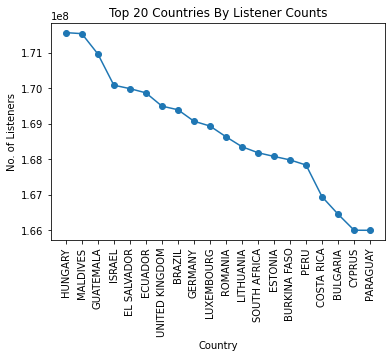

In [7]:
#get plot (dot) data
dotX = graphIT["country"]
dotY = graphIT["total listeners"]

plt.plot(dotX, dotY, marker='o')
plt.title('Top 20 Countries By Listener Counts')
plt.xlabel('Country')
plt.ylabel('No. of Listeners')
plt.xticks(rotation=90)
plt.savefig(lineOutputPath)
plt.show()

#### Get count of top 5 artist for the top 5 countries